2.1 Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

2.2 Data Preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

df = pd.read_csv(data)

df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [16]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [17]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [18]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


2.3 Exploratory data analysis

In [22]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribiution of price

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

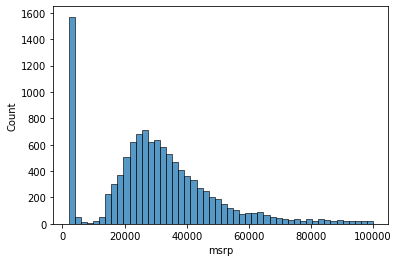

In [27]:
sns.histplot(df.msrp[df.msrp<100000],bins=50);

<AxesSubplot:xlabel='msrp', ylabel='Count'>

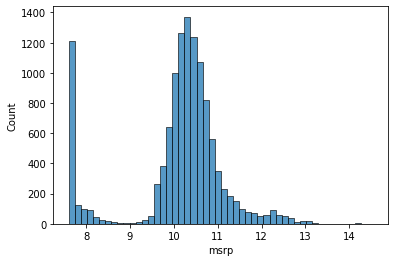

In [30]:
prices_logs = np.log1p(df.msrp)

sns.histplot(prices_logs, bins=50)

Missing values

In [31]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

2.4 Set up the validation framework

In [37]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [38]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [40]:
df.iloc[[0,1,2]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [52]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]


In [57]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [63]:
np.random.seed(7)
np.random.shuffle(idx)

In [64]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [60]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
6616,bmw,m5,2016,premium_unleaded_(required),560.0,8.0,automated_manual,rear_wheel_drive,4.0,"factory_tuner,luxury,high-performance",large,sedan,20,14,3916,94100
11197,gmc,vandura,1994,regular_unleaded,200.0,8.0,automatic,rear_wheel_drive,3.0,NaN,large,cargo_van,16,12,549,2000
8838,mercedes-benz,s-class,2017,premium_unleaded_(required),577.0,8.0,automatic,all_wheel_drive,2.0,"factory_tuner,luxury,high-performance",large,convertible,22,14,617,176400
3327,oldsmobile,cutlass_supreme,1995,regular_unleaded,160.0,6.0,automatic,front_wheel_drive,2.0,NaN,midsize,convertible,26,17,26,2000
8938,volvo,s80,2015,regular_unleaded,300.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,28,19,870,45100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10061,pontiac,sunbird,1992,regular_unleaded,111.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,32,22,210,2000
4413,ford,explorer,2017,regular_unleaded,280.0,4.0,automatic,all_wheel_drive,4.0,"crossover,flex_fuel,performance",midsize,4dr_suv,25,18,5657,43675
3606,cadillac,dts,2011,premium_unleaded_(recommended),292.0,8.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,23,15,1624,59875
9840,kia,sorento,2017,regular_unleaded,290.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,23,17,1720,40400


In [65]:
len(df_train),len(df_test),len(df_val)

(7150, 2382, 2382)

In [67]:
df_train =  df_train.reset_index(drop = True)
df_val =  df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop=True)

In [70]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


In [71]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [72]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,dodge,ram_150,1992,regular_unleaded,230.0,8.0,manual,rear_wheel_drive,2.0,NaN,large,extended_cab_pickup,16,11,1851
1,ford,freestar,2005,regular_unleaded,NaN,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,22,16,5657
2,kia,spectra,2009,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,30,23,1720
3,chevrolet,silverado_1500_classic,2007,regular_unleaded,195.0,6.0,manual,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,19,14,1385
4,chrysler,300,2017,regular_unleaded,292.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,sedan,27,18,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,dodge,ram_250,1992,regular_unleaded,180.0,6.0,manual,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,17,13,1851
7146,oldsmobile,silhouette,2003,regular_unleaded,185.0,6.0,automatic,all_wheel_drive,4.0,NaN,midsize,passenger_minivan,22,16,26
7147,dodge,dakota,2010,regular_unleaded,210.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,compact,extended_cab_pickup,18,14,1851
7148,audi,a3,2015,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,4.0,luxury,compact,sedan,33,24,3105
